In [103]:
import glob
import sys
import os
import csv
import numpy as np

import pandas as pd
ulc_files = glob.glob('./data/energydata-master/csv/ulc*.txt')
crac_files = glob.glob('./data/energydata-master/csv/crac*.txt')
cols = ['timeval', 'L1PhaseVoltage_Vx10', 'L1Current_mA', 'L1ActivePower_W',
       'L1InductivePower_var', 'L1CapacitivePower_var', 'L1ApparentPower_VA',
         'L2Current_mA', 'L2ActivePower_W', 'L2InductivePower_var',
        'ActiveThreePhasePower_W', 'InductiveThreePhasePower_var',
       'CapacitiveThreePhasePower_var', 'ApparentThreePhasePower_VA']

In [104]:
def read_csv(files):
    df_all = []
    filenames = []
    for file in files:

        df = pd.read_csv(file)

        df['timeval'] = pd.to_datetime(df['timeval'])
        df_all.append(df)
        head_tail = os.path.split(file)
        fname = head_tail[1].split('.')
        filenames.append(fname[0])
        outfile = head_tail[0]+'/'+fname[0]+'-describe.csv'

        df[cols].describe().to_csv(outfile)
    return df_all,filenames


In [105]:



file_all = ['./data/energydata-master/csv/crac3.txt',
        './data/energydata-master/csv/crac4.txt',
         './data/energydata-master/csv/ulc1.txt',
         './data/energydata-master/csv/ulc2.txt',
         './data/energydata-master/csv/ulc3.txt',
         './data/energydata-master/csv/ulc4.txt',
        './data/energydata-master/csv/ulc5.txt',
         './data/energydata-master/csv/ulc6.txt',
        './data/energydata-master/csv/crac5.txt',
         './data/energydata-master/csv/crac6.txt',
         './data/energydata-master/csv/crac2.txt',
         './data/energydata-master/csv/crac1.txt'
       ]



#cols = [ 'ActiveThreePhasePower_W', 'InductiveThreePhasePower_var']




 


In [119]:
files = crac_files
df_all,filenames = read_csv(files)


In [107]:
filenames

['crac1', 'crac2', 'crac3', 'crac4', 'crac5', 'crac6']

In [108]:
import matplotlib.pyplot as plt
import math
%matplotlib inline


def scatter_plot(df_all,filenames,meter_str):
    # define subplot grid

    nrows =  math.ceil(len(df_all)/2)


    fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 12))
    plt.subplots_adjust(hspace=0.8)
    plt.title("ActiveThreePhasePower_W ({})".format(meter_str))
    fig.suptitle("ActiveThreePhasePower_W ({})".format(meter_str), fontsize=12, y=0.95)

    # loop through tickers and axes
    i = 0
    tickers =filenames

    for ticker, ax in zip(tickers, axs.ravel()):
        # filter df for ticker and plot on specified axes
        #df[df["ticker"] == ticker].plot(ax=ax)

        df = df_all[i]
        df.plot.scatter(x='timeval', y='ActiveThreePhasePower_W',ax=ax, title=filenames[i],color='red')
        #df.boxplot(by ='timeval', column =['ActiveThreePhasePower_W'],grid = False)
        # chart formatting
        ax.set_title(ticker.upper())
        #ax.get_legend().remove()
        ax.set_ylabel("")
        ax.set_xlabel("")
        i = i +1

    plt.savefig(meter_str+'-scatter.png')
    plt.show()


    


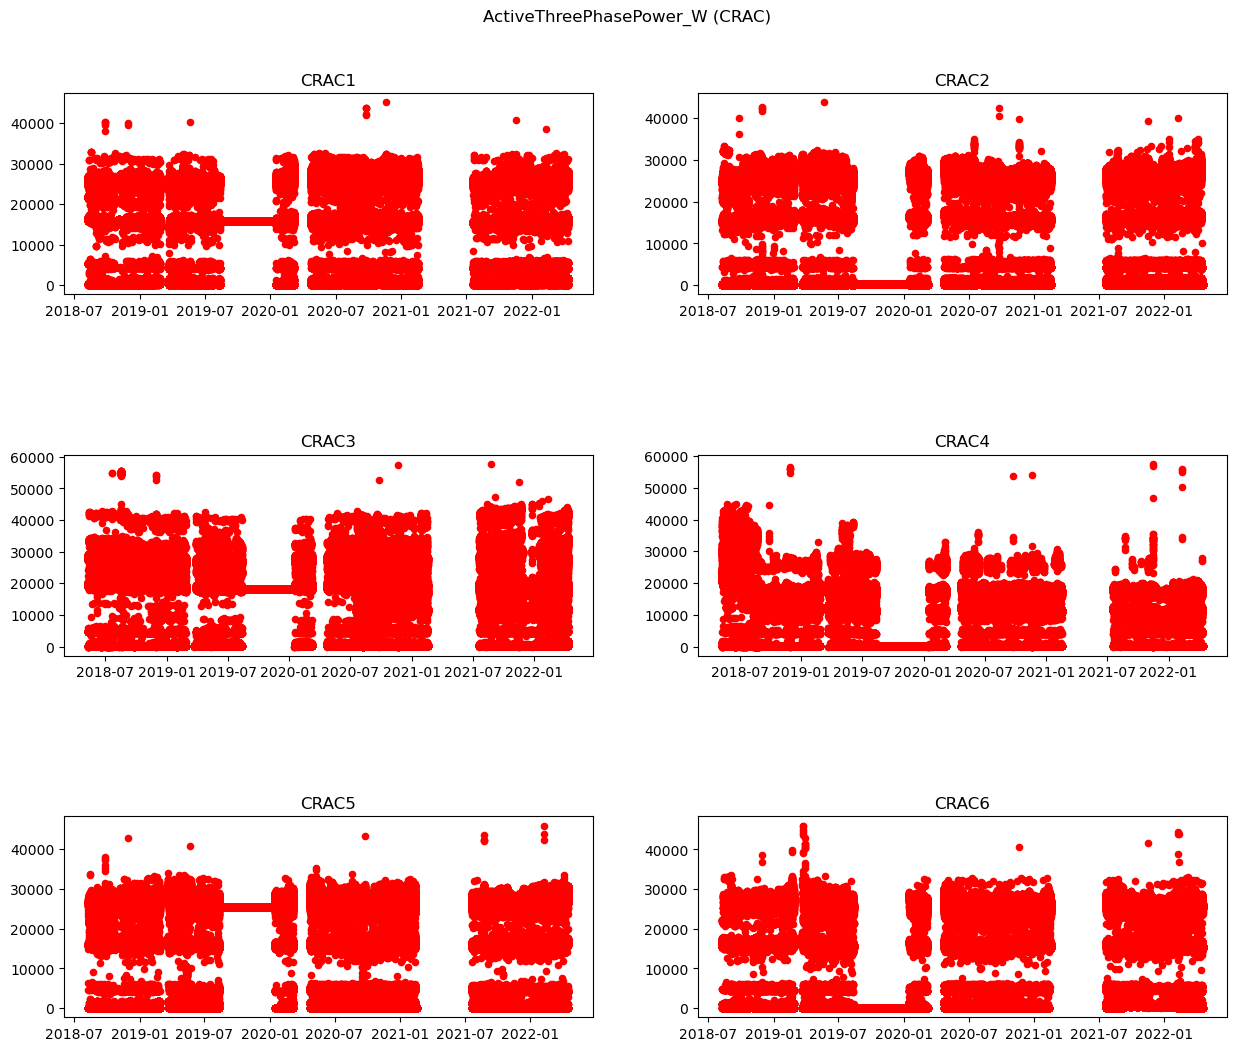

In [109]:
scatter_plot(df_all,filenames,'CRAC')


In [ ]:
nrows =  math.ceil(limit_file/2)


fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.8)
plt.title("ActiveThreePhasePower_W ({})".format('meter_str'))
fig.suptitle("ActiveThreePhasePower_W ({})".format('meter_str'), fontsize=12, y=0.95)

# loop through tickers and axes
i = 0
tickers =filenames

for ticker, ax in zip(tickers, axs.ravel()):
    # filter df for ticker and plot on specified axes
    #df[df["ticker"] == ticker].plot(ax=ax)
    if limit_rows >0:
        df = df_all[i].head(limit_rows)
    else:
        df = df_all[i]
    #df.plot.scatter(x='timeval', y='ActiveThreePhasePower_W',ax=ax, title=filenames[i],color='red')
    df.boxplot(by ='timeval', column =['ActiveThreePhasePower_W'],grid = False,ax=ax)
    # chart formatting
    ax.set_title(ticker.upper())
    ax.get_figure().suptitle(filenames[i])
    #ax.get_legend().remove()
    ax.set_ylabel("")
    ax.set_xlabel("")
    i = i +1
    if (i > limit_file):
        break


plt.show()
plt.savefig(meter_str+'-box.png')

In [120]:

def get_summary_statistics(dataset,name):
    
    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)
    quartile_1 = np.round(dataset.quantile(0.25), 2)
    quartile_3 = np.round(dataset.quantile(0.75), 2)
    # Interquartile range
    iqr = np.round(quartile_3 - quartile_1, 2)
    
    statistics = {
    'Statistic': ['Min', 'Mean', 'Max', '25th Percentile', 'Median', '75th Percentile', 'IQR'],
     name: [min_value, mean, max_value, quartile_1, median, quartile_3, iqr]
    }

    # Converting the dictionary to a pandas DataFrame
    stats_df = pd.DataFrame(statistics)
    
    stats_df  = stats_df.transpose()

    # Optionally, renaming the columns after transpose for clarity
    stats_df.columns = stats_df.iloc[0] # Set new column headers to the first row (Statistic names)
    stats_df = stats_df[1:] # Remove the first row as it's now redundant
    stats_df['file'] = name
   
    

    # Writing the DataFrame to a CSV file
   
    
    #display
    #print(outfile)
    print('Min: %s' % min_value)
    print('Mean: %s' % mean)
    print('Max: %s' % max_value)
    print('25th percentile: %s' % quartile_1)
    print('Median: %s' % median)
    print('75th percentile: %s' % quartile_3)
    print('Interquartile range (IQR): %s' % iqr)
    print('Setosa summary statistics')
    
    return stats_df

In [111]:

def merge_df (df_all, filenames,limit_rows,limit_files,name_prefix):
    if len(df_all) == 0:
        return pd.DataFrame()
    stats_df = get_summary_statistics(df_all[0]['ActiveThreePhasePower_W'],filenames[0])
    out_stats_file = '/media/hdd10T/Weather/'+name_prefix+'-stats.csv'
    df_all[0]['file'] = filenames[0]
    if limit_rows > 0:
        df_all[0] = df_all[0].head(limit_rows)
    df_merge = df_all[0]
    df_merge['file'] = filenames[0]
    for i in range(1,len(df_all)):
        if i >= limit_files:
            break
        
        df_stat = get_summary_statistics(df_all[i]['ActiveThreePhasePower_W'],filenames[i])
        stats_df =    pd.concat([stats_df,df_stat],axis=0)    
        
        df_all[i]['file']= filenames[i]
        if limit_rows > 0:
            df_all[i] = df_all[0].head(limit_rows)
        df_merge = pd.concat([df_merge,df_all[i]],axis = 0)
    stats_df.to_csv(out_stats_file, index=False)
    return df_merge, stats_df

In [134]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

def box_plot(df_all,filenames, meter_str,limit_rows=-1, limit_files=1, prefix_name=''):
    # define subplot grid

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 12))
    plt.subplots_adjust(hspace=0.8)
    plt.title("ActiveThreePhasePower_W (%s)"%(prefix_name))
    #fig.suptitle("ActiveThreePhasePower_W ({})".format(meter_str), fontsize=12, y=0.95)

    
    df_merge, stats_df = merge_df(df_all,filenames, limit_rows,limit_files,prefix_name)
     
    df_merge.boxplot(by ='file', column =['ActiveThreePhasePower_W'],grid = False,ax=ax)
    # chart formatting
    #ax.set_title(ticker.upper())
    ax.get_figure().suptitle('')
    #ax.get_legend().remove()
    ax.set_ylabel("")
    ax.set_xlabel("")
    plt.savefig('/media/hdd10T/Weather/'+prefix_name+'-box.png')
    plt.show()
   
    
     
   
    

# CRAC

Min: 0
Mean: 11216.34
Max: 45160
25th percentile: 160.0
Median: 15400.0
75th percentile: 16000.0
Interquartile range (IQR): 15840.0
Setosa summary statistics
Min: 0
Mean: 9471.04
Max: 43800
25th percentile: 120.0
Median: 160.0
75th percentile: 16720.0
Interquartile range (IQR): 16600.0
Setosa summary statistics
Min: 0.0
Mean: 10959.92
Max: 57680.0
25th percentile: 160.0
Median: 11520.0
75th percentile: 18560.0
Interquartile range (IQR): 18400.0
Setosa summary statistics
Min: 0.0
Mean: 6665.48
Max: 57480.0
25th percentile: 120.0
Median: 160.0
75th percentile: 11840.0
Interquartile range (IQR): 11720.0
Setosa summary statistics
Min: 0
Mean: 13165.16
Max: 45920
25th percentile: 160.0
Median: 15560.0
75th percentile: 25400.0
Interquartile range (IQR): 25240.0
Setosa summary statistics
Min: 0
Mean: 8839.25
Max: 46000
25th percentile: 120.0
Median: 680.0
75th percentile: 16040.0
Interquartile range (IQR): 15920.0
Setosa summary statistics


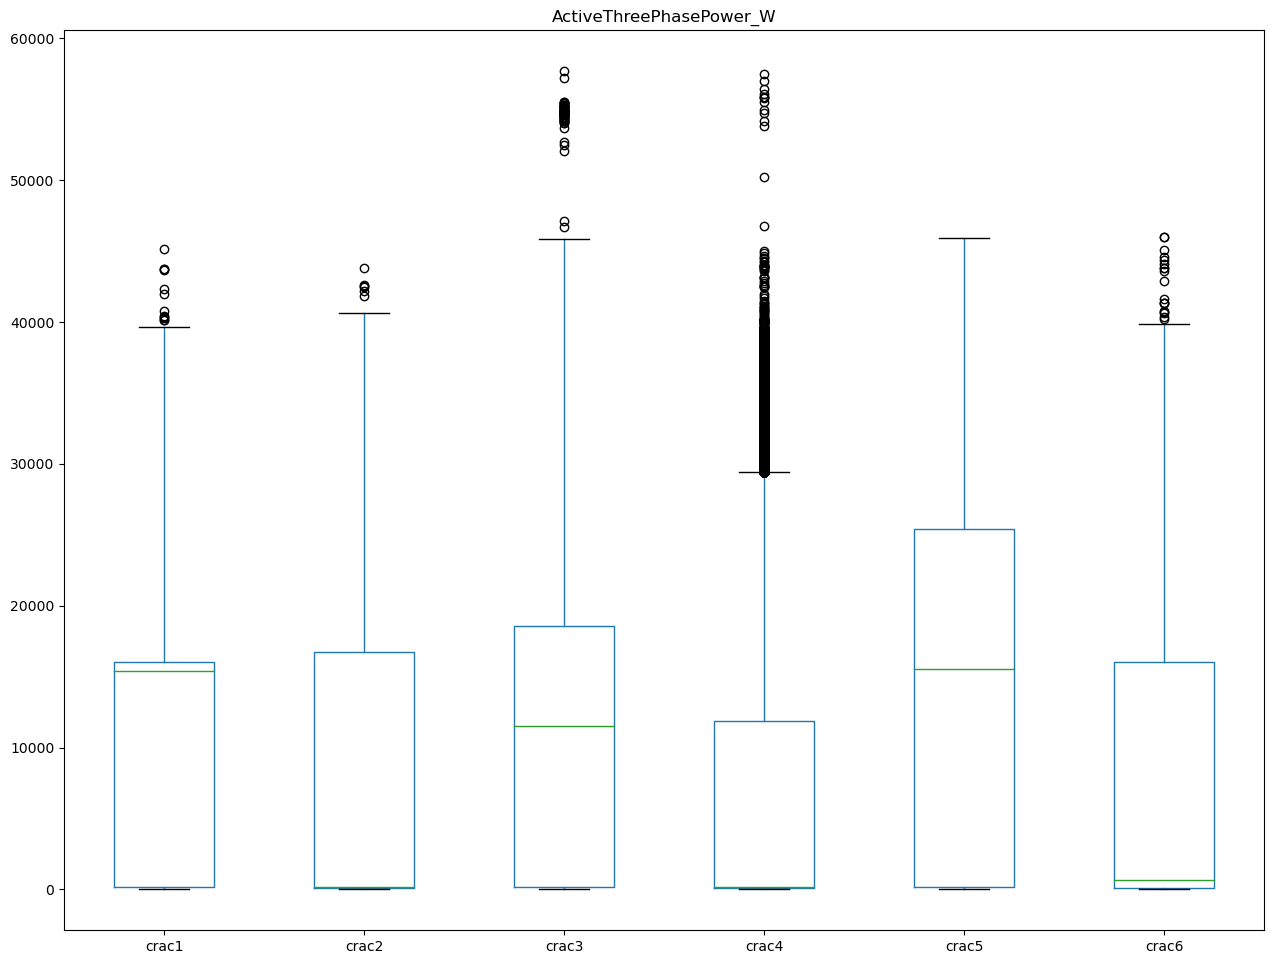

In [135]:
box_plot(df_all,filenames,'CRAC',-1,len(df_all),prefix_name='CRAC')


# ULC

In [136]:
files = ulc_files
df_all,filenames = read_csv(files)


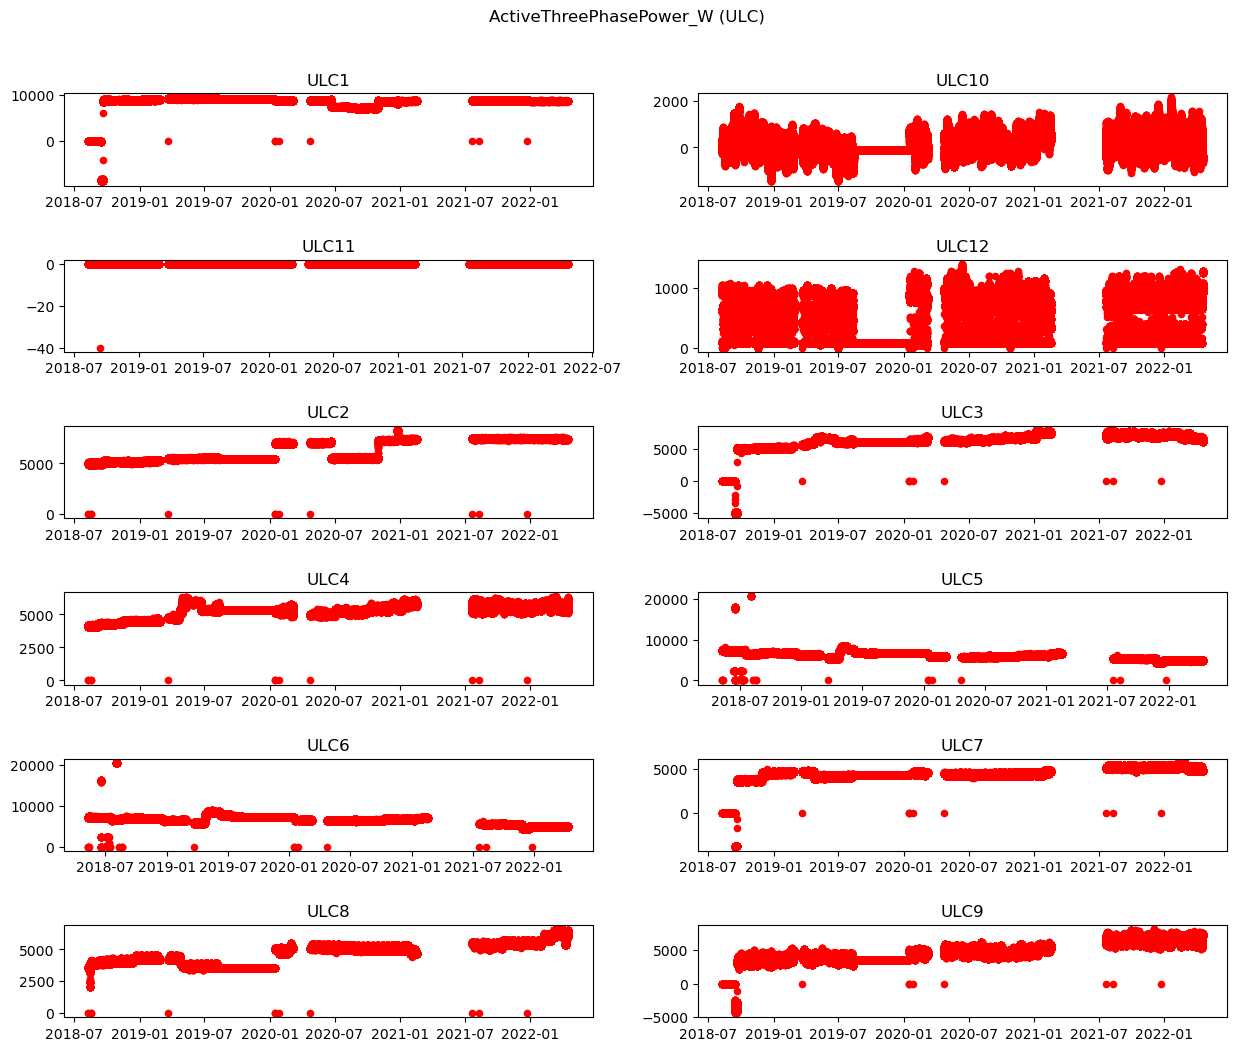

In [117]:
scatter_plot(df_all,filenames,'ULC')

Min: -8960
Mean: 8306.58
Max: 9480
25th percentile: 8640.0
Median: 8760.0
75th percentile: 9120.0
Interquartile range (IQR): 480.0
Setosa summary statistics
Min: -1480
Mean: 107.1
Max: 2160
25th percentile: -120.0
Median: 40.0
75th percentile: 360.0
Interquartile range (IQR): 480.0
Setosa summary statistics
Min: -40
Mean: -0.0
Max: 0
25th percentile: 0.0
Median: 0.0
75th percentile: 0.0
Interquartile range (IQR): 0.0
Setosa summary statistics
Min: 0
Mean: 422.74
Max: 1400
25th percentile: 80.0
Median: 400.0
75th percentile: 760.0
Interquartile range (IQR): 680.0
Setosa summary statistics
Min: 0
Mean: 6219.51
Max: 8280
25th percentile: 5480.0
Median: 5520.0
75th percentile: 7360.0
Interquartile range (IQR): 1880.0
Setosa summary statistics
Min: -5200
Mean: 6042.89
Max: 7880
25th percentile: 5960.0
Median: 6280.0
75th percentile: 6760.0
Interquartile range (IQR): 800.0
Setosa summary statistics
Min: 0
Mean: 5236.73
Max: 6360
25th percentile: 5000.0
Median: 5360.0
75th percentile: 5560.0


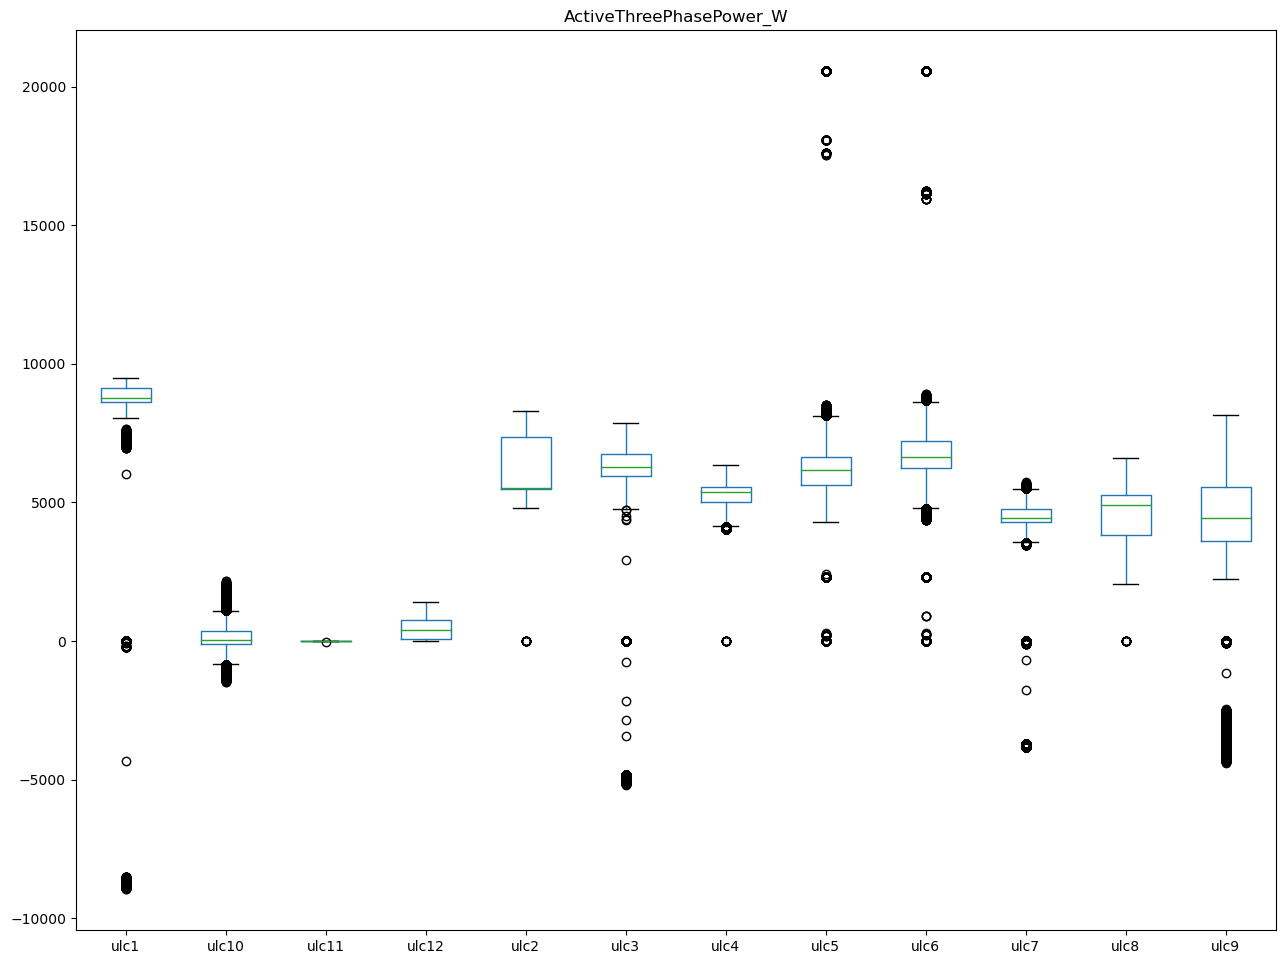

In [137]:
 
box_plot(df_all,filenames,'ULC',-1,len(df_all),'ULC')

In [7]:
len(df_all[0])

1578402

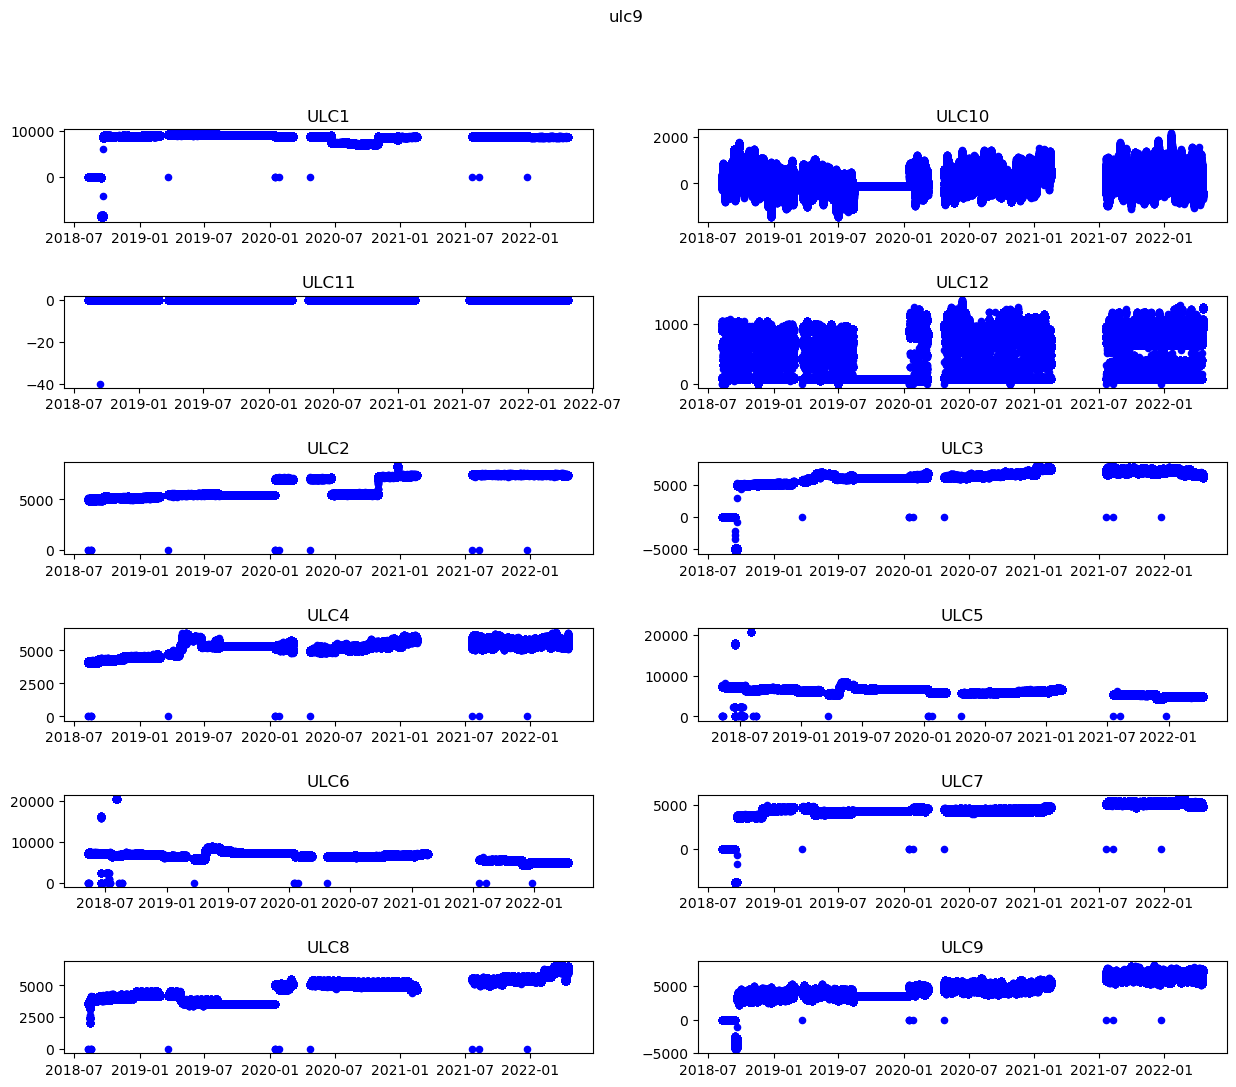

In [5]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

# define subplot grid
 
nrows =  math.ceil(len(df_all)/2)
 

fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.8)
plt.title("ActiveThreePhasePower_W (ULC)")
fig.suptitle("ActiveThreePhasePower_W (ULC)", fontsize=12, y=0.95)

# loop through tickers and axes
i = 0
tickers =filenames

for ticker, ax in zip(tickers, axs.ravel()):
    # filter df for ticker and plot on specified axes
    #df[df["ticker"] == ticker].plot(ax=ax)
     
    df = df_all[i]
    df.plot.scatter(x='timeval', y='ActiveThreePhasePower_W',ax=ax, title=filenames[i],color='blue')

    # chart formatting
    ax.set_title(ticker.upper())
    #ax.get_legend().remove()
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.get_figure().suptitle(filenames[i])
    i = i +1
plt.savefig('/media/hdd10T/Weather/ULC-scatter.png')
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

# define subplot grid
 
nrows =  math.ceil(len(df_all)/2)
 

fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.8)
plt.title("ActiveThreePhasePower_W (ULC)")
fig.suptitle("ActiveThreePhasePower_W (ULC)", fontsize=12, y=0.95)

# loop through tickers and axes
i = 0
tickers =filenames

for ticker, ax in zip(tickers, axs.ravel()):
    # filter df for ticker and plot on specified axes
    #df[df["ticker"] == ticker].plot(ax=ax)
     
    df = df_all[i]
    #df.plot.scatter(x='timeval', y='ActiveThreePhasePower_W',ax=ax, title=filenames[i],color='red')
    df.boxplot(by ='timeval', column =['ActiveThreePhasePower_W'],grid = False,ax=ax)
    # chart formatting
    ax.get_figure().suptitle(filenames[i])
    ax.set_title(ticker.upper())
    #ax.get_legend().remove()
    ax.set_ylabel("")
    ax.set_xlabel("")
    i = i +1

plt.show()
plt.savefig('ULC-box.png')

In [5]:
df.columns

Index(['timeval', 'L1PhaseVoltage_Vx10', 'L1Current_mA', 'L1ActivePower_W',
       'L1InductivePower_var', 'L1CapacitivePower_var', 'L1ApparentPower_VA',
       'L1PowerFactor_x100', 'CosPhiL1_x100', 'L2PhaseVoltage_Vx10',
       'L2Current_mA', 'L2ActivePower_W', 'L2InductivePower_var',
       'L2CapacitivePower_var', 'L2ApparentPower_VA', 'L2PowerFactor_x100',
       'CosPhiL2_x100', 'L3PhaseVoltage_Vx10', 'L3Current_mA',
       'L3ActivePower_W', 'L3InductivePower_var', 'L3CapacitivePower_var',
       'L3ApparentPower_VA', 'L3PowerFactor_x100', 'CosPhiL3_x100',
       'ActiveThreePhasePower_W', 'InductiveThreePhasePower_var',
       'CapacitiveThreePhasePower_var', 'ApparentThreePhasePower_VA',
       'ThreePhasePowerFactor_x100', 'ThreePhaseCosPhi_x100',
       'L1Frequency_Hzx100', 'L1L2Voltage_Vx10', 'L2L3Voltage_Vx10',
       'L3L1Voltage_Vx10', 'NeutralCurrentN_mA', 'L1VoltageTHD_x10',
       'L2VoltageTHD_x10', 'L3VoltageTHD_x10', 'L1CurrentTHD_x10',
       'L2CurrentTHD_x10',

In [6]:
cols = ['timeval', 'L1PhaseVoltage_Vx10', 'L1Current_mA', 'L1ActivePower_W',
       'L1InductivePower_var', 'L1CapacitivePower_var', 'L1ApparentPower_VA',
         'L2Current_mA', 'L2ActivePower_W', 'L2InductivePower_var',
        'ActiveThreePhasePower_W', 'InductiveThreePhasePower_var',
       'CapacitiveThreePhasePower_var', 'ApparentThreePhasePower_VA']


In [7]:
df[cols].describe()

,L1PhaseVoltage_Vx10,L1Current_mA,L1ActivePower_W,L1InductivePower_var,L1CapacitivePower_var,L1ApparentPower_VA,L2Current_mA,L2ActivePower_W,L2InductivePower_var,ActiveThreePhasePower_W,InductiveThreePhasePower_var,CapacitiveThreePhasePower_var,ApparentThreePhasePower_VA
count,1.685981e+06,1.685981e+06,1.685981e+06,1.685981e+06,1.685981e+06,1.685981e+06,1.685981e+06,1.685981e+06,1.685981e+06,1.685981e+06,1.685981e+06,1.685981e+06,1.685981e+06
mean,3.541768e+04,1.921792e+04,4.108422e+03,1.214963e+03,1.671492e+00,4.337380e+03,1.591225e+04,3.475625e+03,8.943215e+02,1.095992e+04,1.000835e+05,9.974958e+00,1.153729e+04
std,3.181590e+06,1.724202e+04,3.765743e+03,1.098475e+03,2.353417e+01,3.909516e+03,1.554439e+04,3.440475e+03,9.022649e+02,1.054965e+04,9.298352e+06,3.623767e+02,1.093456e+04
min,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.261000e+03,8.400000e+02,1.600000e+02,0.000000e+00,0.000000e+00,1.600000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+02,0.000000e+00,0.000000e+00,1.600000e+02
50%,2.267000e+03,2.148000e+04,4.480000e+03,1.600000e+03,0.000000e+00,4.840000e+03,1.636000e+04,3.560000e+03,8.800000e+02,1.152000e+04,3.640000e+03,0.000000e+00,1.224000e+04
75%,2.279000e+03,3.240000e+04,6.880000e+03,2.360000e+03,0.000000e+00,7.320000e+03,2.740000e+04,5.920000e+03,1.840000e+03,1.856000e+04,6.440000e+03,0.000000e+00,1.980000e+04
max,3.054019e+08,8.788000e+04,1.944000e+04,5.160000e+03,9.200000e+02,2.101400e+04,8.572000e+04,2.992000e+04,4.368000e+04,5.768000e+04,8.925484e+08,3.608000e+04,5.884000e+04
